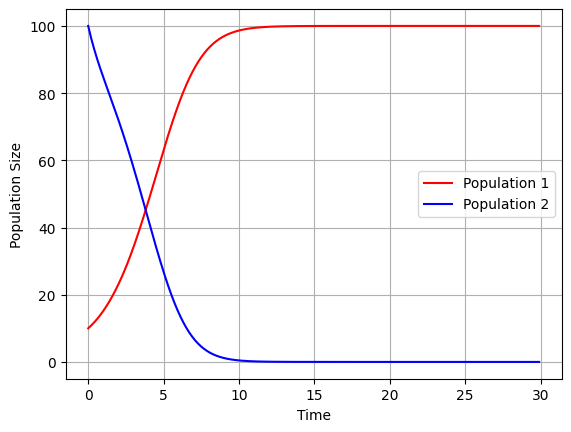

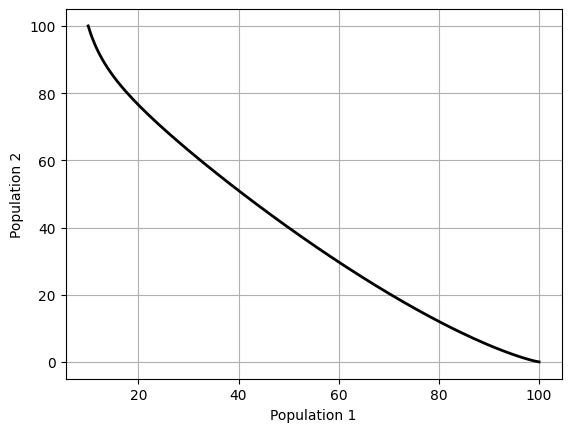

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 定义微分方程
def fun(x, t, r1, r2, n1, n2, s1, s2):
    dx1 = r1 * x[0] * (1 - x[0] / n1 - s1 * x[1] / n2)
    dx2 = r2 * x[1] * (1 - s2 * x[0] / n1 - x[1] / n2)
    return [dx1, dx2]

# 设置参数
r1 = 1
r2 = 1
n1 = 100
n2 = 100
s1 = 0.5
s2 = 2

# 设置时间点
t = np.arange(0, 30, 0.1)

# 设置初始条件
x0 = [10, 100]

# 求解微分方程
result = odeint(fun, x0, t, args=(r1, r2, n1, n2, s1, s2))

# 绘制结果
plt.plot(t, result[:, 0], 'r', label='Population 1')
plt.plot(t, result[:, 1], 'b', label='Population 2')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid()
plt.show()

# 相轨线
plt.plot(result[:, 0], result[:, 1], 'k', linewidth=2)
plt.xlabel('Population 1')
plt.ylabel('Population 2')
plt.grid()
plt.show()


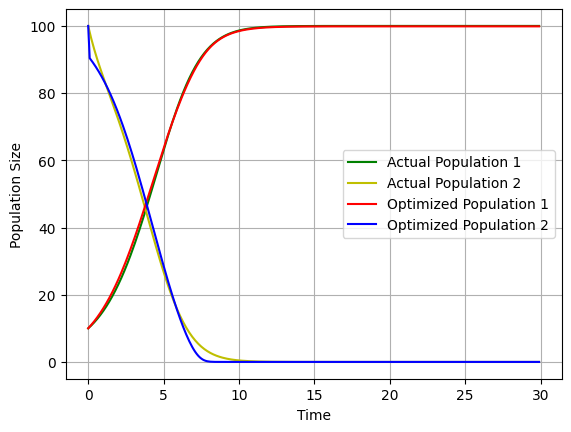

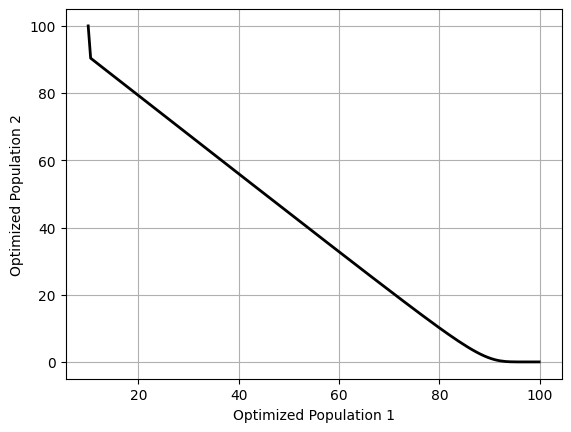

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

# 定义微分方程
def fun(x, t, r1, r2, n1, n2, s1, s2):
    dx1 = r1 * x[0] * (1 - x[0] / n1 - s1 * x[1] / n2)
    dx2 = r2 * x[1] * (1 - s2 * x[0] / n1 - x[1] / n2)
    return [dx1, dx2]

# 定义损失函数，即模型输出与实际数据之间的差异
def loss(params, t, data):
    r1, r2, n1, n2, s1, s2 = params
    result = odeint(fun, [10, 10], t, args=(r1, r2, n1, n2, s1, s2))
    return np.sum((result - data) ** 2)

# 生成合成数据（示例中使用随机数据，请替换为实际数据）
t = np.arange(0, 30, 0.1)
actual_data = odeint(fun, [10, 100], t, args=(1, 1, 100, 100, 0.5, 2))

# 初始参数猜测
initial_params = [1, 1, 100, 100, 0.5, 2]

# 使用梯度下降法优化参数
result = minimize(loss, initial_params, args=(t, actual_data), method='BFGS')

# 获取优化后的参数
optimized_params = result.x

# 重新求解微分方程，使用优化后的参数
optimized_result = odeint(fun, [10, 100], t, args=tuple(optimized_params))

# 绘制结果
plt.plot(t, actual_data[:, 0], 'g', label='Actual Population 1')
plt.plot(t, actual_data[:, 1], 'y', label='Actual Population 2')
plt.plot(t, optimized_result[:, 0], 'r', label='Optimized Population 1')
plt.plot(t, optimized_result[:, 1], 'b', label='Optimized Population 2')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid()
plt.show()

# 相轨线
plt.plot(optimized_result[:, 0], optimized_result[:, 1], 'k', linewidth=2)
plt.xlabel('Optimized Population 1')
plt.ylabel('Optimized Population 2')
plt.grid()
plt.show()


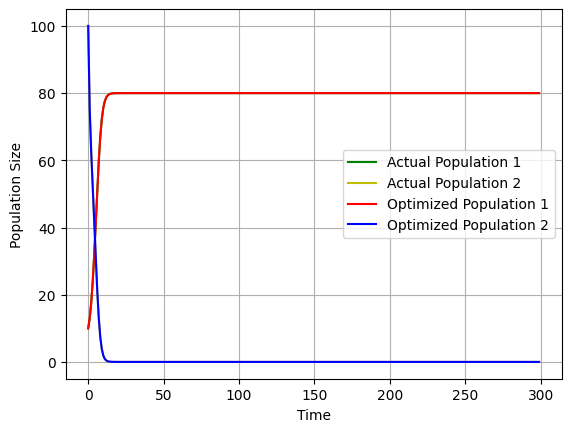

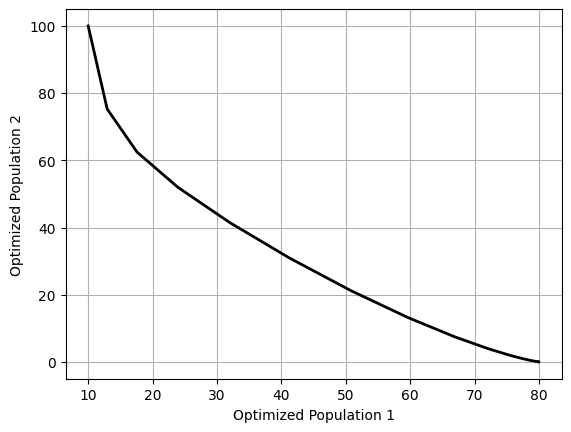

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize
import pandas as pd

# 定义微分方程
def fun(x, t, r1, r2, n1, n2, s1, s2, P1):
    dx1 = r1 * x[0] * (1 - x[0] / n1 - s1 * x[1] / n2) - P1 * x[0]
    dx2 = r2 * x[1] * (1 - s2 * x[0] / n1 - x[1] / n2) - P1 * x[1]
    return [dx1, dx2]

# 定义损失函数，即模型输出与实际数据之间的差异
def loss(params, t, data):
    r1, r2, n1, n2, s1, s2, P1 = params
    result = odeint(fun, [10, 100], t, args=(r1, r2, n1, n2, s1, s2, P1))
    return np.sum((result - data) ** 2)

# 生成合成数据（示例中使用随机数据，请替换为实际数据）
t = np.arange(0, 300, 1)
actual_data = odeint(fun, [10, 100], t, args=(1, 1, 100, 100, 0.5, 2,0.2))

# 初始参数猜测
initial_params = [1, 1, 100, 100, 0.5, 2, 0.1]

# 使用梯度下降法优化参数
result = minimize(loss, initial_params, args=(t, actual_data), method='BFGS')

# 获取优化后的参数
optimized_params = result.x

# 重新求解微分方程，使用优化后的参数
optimized_result = odeint(fun, [10, 100], t, args=tuple(optimized_params))
data = pd.DataFrame(optimized_result)
data.to_excel("optimized_params_data.xlsx")

# 绘制结果
plt.plot(t, actual_data[:, 0], 'g', label='Actual Population 1')
plt.plot(t, actual_data[:, 1], 'y', label='Actual Population 2')
plt.plot(t, optimized_result[:, 0], 'r', label='Optimized Population 1')
plt.plot(t, optimized_result[:, 1], 'b', label='Optimized Population 2')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid()
plt.show()

# 相轨线
plt.plot(optimized_result[:, 0], optimized_result[:, 1], 'k', linewidth=2)
plt.xlabel('Optimized Population 1')
plt.ylabel('Optimized Population 2')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

# 定义微分方程
def fun(x, t, r1, r2, n1, n2, s1, s2, P1):
    """
    x: 各群体的初始数量 [x1, x2]
    t: 时间
    r1, r2: 各群体的增长率
    n1, n2: 各群体的承载容量
    s1, s2: 交互影响系数
    P1: 群体承载容量的变化率
    """
    dx1 = r1 * x[0] * (1 - x[0] / n1 - s1 * x[1] / n2) + P1 * x[0]
    dx2 = r2 * x[1] * (1 - s2 * x[0] / n1 - x[1] / n2) + P1 * x[1]
    return [dx1, dx2]

# 定义损失函数，即模型输出与实际数据之间的差异
def loss(params, t, data):
    """
    params: 微分方程的参数 [r1, r2, n1, n2, s1, s2, P1]
    t: 时间点
    data: 实际数据，每一行对应一个时间点的群体数量 [x1_actual, x2_actual]
    """
    r1, r2, n1, n2, s1, s2, P1 = params
    # 使用odeint求解微分方程，得到模型输出结果
    result = odeint(fun, [5000,1.7], t, args=(r1, r2, n1, n2, s1, s2, P1))
    # 计算模型输出与实际数据之间的差异的平方和
    return np.sum((result - data) ** 2)

# 从Excel读取数据
excel_path = r"D:\software_bag_X\MicrosoftVScodefiles\ZQdata.xlsx"  # 替换为你的Excel文件路径
df = pd.read_excel(excel_path)
t = df['Time'].values
# t = np.array([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033])
actual_data = df[['Fuel', 'EV']].values
l=100
# 初始参数猜测
initial_params = [5.96538797e-01,1.26869927e+00, 2.67356764e+05, 2.67829416e+05, 4.74334599e+01, 4.18257333e+00,-3.98375467e-01]
# initial_params = [5.96538797e-01,1.26869927e+00, 2.67356764e+04, 2.67829416e+04, 4.74334599e+01, 1.18257333e+00,2.98375467e-01]
while l>0:
# 定义函数用于计算损失
    def loss_function(params):
        return loss(params, t, actual_data)

    # 使用梯度下降法优化参数
    result = minimize(loss_function, initial_params, method='BFGS')
    l-=1
    # 获取优化后的参数
    initial_params = result.x
    optimized_params = result.x
    print("Optimized Parameters:", optimized_params)

# 重新求解微分方程，使用优化后的参数
t = np.array([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033])
optimized_result = odeint(fun, [ 5000,1.7], t, args=tuple(optimized_params))

df = pd.DataFrame(optimized_result)
df1 = pd.DataFrame(actual_data)
df2 = pd.DataFrame(optimized_params)

df.to_excel("optimized_result1.xlsx")
df1.to_excel("actual_data.xlsx")
df2.to_excel("optimized_params.xlsx")


# 绘制结果
# plt.plot(t, actual_data[:, 0], 'g', label='Actual Fuel')
# plt.plot(t, actual_data[:, 1], 'y', label='Actual EV')
plt.plot(t, optimized_result[:, 0], 'r', label='Optimized Fuel')
plt.plot(t, optimized_result[:, 1], 'b', label='Optimized EV')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid()
plt.show()

# 相轨线

plt.plot(optimized_result[:, 0], optimized_result[:, 1], 'k', linewidth=2)
plt.xlabel('Optimized Population 1')
plt.ylabel('Optimized Population 2')
plt.grid()
plt.show()


d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Optimized Parameters: [1.40323395e-01 1.80439126e+00 1.65515308e+05 1.30085641e+04
 5.12106575e+01 9.77339329e+00 2.71260057e-01 4.57102183e-01]


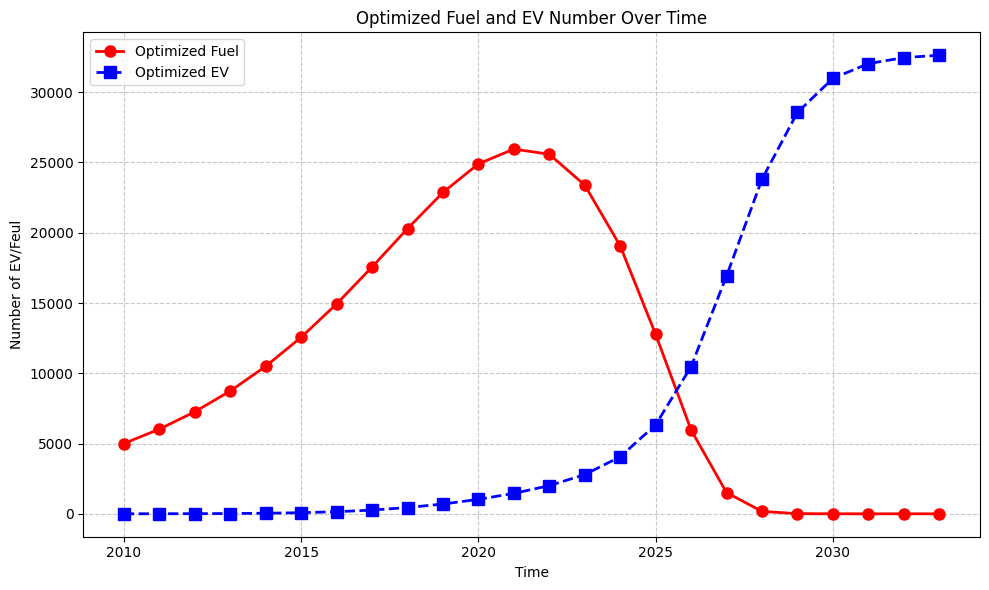

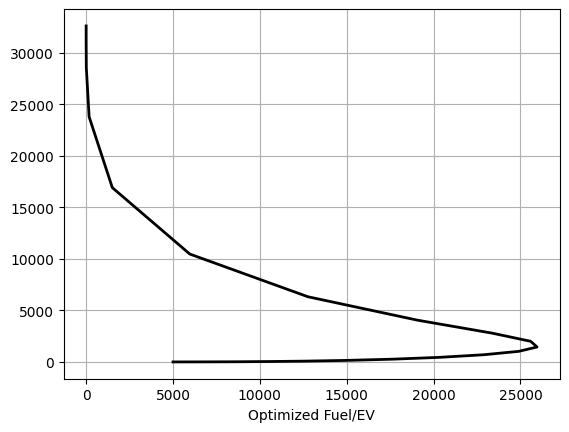

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

# 定义微分方程
def fun(x, t, r1, r2, n1, n2, s1, s2, P1, lag_factor):
    """
    x: 各群体的初始数量 [x1, x2]
    t: 时间
    r1, r2: 各群体的增长率
    n1, n2: 各群体的承载容量
    s1, s2: 交互影响系数
    P1: 群体承载容量的变化率
    lag_factor: 滞后因子
    """
    lagged_x1 = lag_factor * x[0]
    lagged_x2 = lag_factor * x[1]
    
    dx1 = r1 * lagged_x1 * (1 - lagged_x1 / n1 - s1 * lagged_x2 / n2) + P1 * lagged_x1
    dx2 = r2 * lagged_x2 * (1 - s2 * lagged_x1 / n1 - lagged_x2 / n2) + P1 * lagged_x2
    
    return [dx1, dx2]

# 定义损失函数，即模型输出与实际数据之间的差异
def loss(params, t, data):
    """
    params: 微分方程的参数 [r1, r2, n1, n2, s1, s2, P1, lag_factor]
    t: 时间点
    data: 实际数据，每一行对应一个时间点的群体数量 [x1_actual, x2_actual]
    """
    r1, r2, n1, n2, s1, s2, P1, lag_factor = params
    # 使用odeint求解微分方程，得到模型输出结果
    result = odeint(fun, [5000,1.7], t, args=(r1, r2, n1, n2, s1, s2, P1, lag_factor))
    # 计算模型输出与实际数据之间的差异的平方和
    return np.sum((result - data) ** 2)

# 从Excel读取数据
excel_path = r"D:\software_bag_X\MicrosoftVScodefiles\ZQdata.xlsx"  # 替换为你的Excel文件路径
df = pd.read_excel(excel_path)
t = df['Time'].values
actual_data = df[['Fuel', 'EV']].values

# 初始参数猜测
initial_params = [5.96538797e-01, 1.26869927e+00, 1.67356764e+05, 1.07829416e+04, 4.74334599e+01, 4.18257333e+00, -3.98375467e-01, 0.89]

# 定义函数用于计算损失
def loss_function(params):
    return loss(params, t, actual_data)

# 使用梯度下降法优化参数
result = minimize(loss_function, initial_params, method='BFGS')

# 获取优化后的参数
optimized_params = result.x
print("Optimized Parameters:", optimized_params)
t = np.array([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033])
# 重新求解微分方程，使用优化后的参数
optimized_result = odeint(fun, [5000, 1.7], t, args=tuple(optimized_params))

df = pd.DataFrame(optimized_result)
df1 = pd.DataFrame(actual_data)
df2 = pd.DataFrame(optimized_params)

df.to_excel("optimized_result_with_lag1.xlsx")
df1.to_excel("actual_data1.xlsx")
df2.to_excel("optimized_params_with_lag1.xlsx")

# 绘制结果
# plt.plot(t, actual_data[:, 0], 'g', label='Actual Fuel')
# plt.plot(t, actual_data[:, 1], 'y', label='Actual EV')
import matplotlib.pyplot as plt

# 美化图表
plt.figure(figsize=(10, 6))  # 调整图表尺寸

# 绘制优化结果
plt.plot(t, optimized_result[:, 0], 'r', label='Optimized Fuel', linestyle='-', linewidth=2, marker='o', markersize=8)
plt.plot(t, optimized_result[:, 1], 'b', label='Optimized EV', linestyle='--', linewidth=2, marker='s', markersize=8)

plt.xlabel('Time')
plt.ylabel('Number of EV/Feul')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)  # 使用虚线网格，降低网格线强度

# 添加标题
plt.title('Optimized Fuel and EV Number Over Time')

# 添加图表附件
# plt.text(2025, 3000, 'Legend:', fontsize=12)
# plt.text(2030, 2800, 'Fuel (Red)', color='red', fontsize=10)
# plt.text(2030, 2600, 'EV (Blue)', color='blue', fontsize=10)

plt.tight_layout()  # 调整布局，防止图表元素被裁剪

# 保存图表为图片
plt.savefig('optimized_population.png')

plt.show()



# 相轨线
plt.plot(optimized_result[:, 0], optimized_result[:, 1], 'k', linewidth=2)
# plt.xlabel('Optimized Population 1')
plt.xlabel('Optimized Fuel/EV')
plt.grid()
plt.show()
